In [1]:
# import pandas as pd

In [2]:
# pd.read_csv("detect/sample_train.csv")

image_name             annotation
0    00004.jpg                    NaN
1    00007.jpg     0 944 188 2064 806
2    00008.jpg   0 730 1720 1897 2673
3    00017.jpg    0 1221 186 1472 511
4    00019.jpg                    NaN
..         ...                    ...
795  07986.jpg                    NaN
796  07989.jpg                    NaN
797  07991.jpg                    NaN
798  07999.jpg  0 1578 1234 1943 1599
799  08000.jpg                    NaN

[800 rows x 2 columns]

In [3]:
# import os
# import cv2
# import numpy as np
# import pandas as pd


In [5]:
# output_dir = 'detect/annotated'
#     
# csv_path = 'detect/sample_train.csv'
# image_dir = 'detect/sample_train'
# df = pd.read_csv(csv_path)
# image_names = df['image_name'].values
# annotations = df['annotation'].fillna('').values


In [6]:
# images = []
# valid_annotations = []
# for i, name in enumerate(image_names):
#     path = os.path.join(image_dir, name)
#     img = cv2.imread(path)
#     if annotations[i] == '':
#         continue
#     images.append(img)
#     valid_annotations.append(annotations[i])


In [62]:
# print(len(images))
# print(len(valid_annotations))


In [8]:
# boxes = []
# classes = []
# for annot in valid_annotations:
#     annot = annot.split(' ')
#     class_label = int(annot[0])
#     x1, y1, x2, y2 = map(int, annot[1:])
#     w, h = x2 - x1, y2 - y1
#     boxes.append([x1, y1, w, h])
#     classes.append(class_label)


In [11]:
# image_height, image_width, _ = images[0].shape
# yolo_boxes = []
# for box in boxes:
#     x, y, w, h = box
#     center_x = (x + w / 2) / image_width
#     center_y = (y + h / 2) / image_height
#     box_width = w / image_width
#     box_height = h / image_height
#     yolo_boxes.append([center_x, center_y, box_width, box_height])


In [37]:
# for i, img in enumerate(images):
#     img_name = os.path.join(output_dir, f'image_{i}.jpg')
#     cv2.imwrite(img_name, img)
#     with open(os.path.join(output_dir, f'image_{i}.txt'), 'w') as f:
#         class_label = classes[i]
#         x, y, w, h = yolo_boxes[i]
#         f.write(f'{class_label} {x} {y} {w} {h}\n')


In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import pandas as pd


In [2]:
#csv_path = 'detect/sample_train.csv'
#image_dir = 'detect/sample_train'
csv_path = 'detect/sample_test.csv'
image_dir = 'detect/sample_test'


In [3]:
df = pd.read_csv(csv_path)
image_names = df['image_name'].values
annotations = df['annotation'].fillna('').values


In [4]:
valid_images = []
images = []
valid_annotations = []
for i, name in enumerate(image_names):
    path = os.path.join(image_dir, name)
    img = cv2.imread(path)
    if annotations[i] == '':
        continue
    valid_images.append(path)
    images.append(img)
    valid_annotations.append(annotations[i])


In [5]:
print(len(valid_images))
print(len(images))
print(len(valid_annotations))


400
400
400


In [6]:
boxes = []
for annot in valid_annotations:
    annot = annot.split(' ')
    x1, y1, x2, y2 = map(int, annot[1:])
    boxes.append([x1, y1, x2, y2])


In [7]:
scaled_boxes = []
for each, box in enumerate(boxes):
    image_height, image_width, _ = images[each].shape
    x1, y1, x2, y2 = box
    scaled_x1 = x1 / image_width
    scaled_y1 = y1 / image_height
    scaled_x2 = x2 / image_width
    scaled_y2 = y2 / image_height
    scaled_boxes.append([scaled_x1, scaled_y1, scaled_x2, scaled_y2])


In [8]:
scaled_boxes


[[0.3072916666666667, 0.061197916666666664, 0.671875, 0.2623697916666667],
 [0.26526162790697677,
  0.607988688582538,
  0.6893168604651163,
  0.9448568398727466],
 [0.5621546961325967, 0.075, 0.6777163904235728, 0.2060483870967742],
 [0.791015625, 0.4622395833333333, 0.90390625, 0.5358072916666666],
 [0.35625, 0.12897196261682242, 0.41818181818181815, 0.18317757009345795],
 [0.26640625, 0.13151041666666666, 0.38515625, 0.2639973958333333],
 [0.5199857244825125,
  0.2838272045697965,
  0.5885082084225554,
  0.4255622991788647],
 [0.3529664660361135,
  0.5842531272994849,
  0.6203783319002579,
  0.8178807947019867],
 [0.4227941176470588,
  0.33076407506702415,
  0.6638071895424836,
  0.5904825737265416],
 [0.5900735294117647,
  0.12724550898203593,
  0.8056066176470589,
  0.20172155688622753],
 [0.13465909090909092,
  0.8214953271028037,
  0.8352272727272727,
  0.9813084112149533],
 [0.6075142569607515,
  0.04609690444145357,
  0.6699094263669909,
  0.12483176312247644],
 [0.37615988579

In [9]:
tf_images = []
for image in valid_images:
    tf_image = tf.keras.preprocessing.image.load_img(image, target_size = (224, 224))
    tf_image = tf.keras.preprocessing.image.img_to_array(tf_image)
    tf_images.append(tf_image)


In [10]:
tf_images


[array([[[ 1.,  1.,  1.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [15., 15., 15.],
         [15., 15., 15.],
         [ 0.,  0.,  0.]],
 
        [[ 7.,  7.,  7.],
         [ 9.,  9.,  9.],
         [12., 12., 12.],
         ...,
         [15., 15., 15.],
         [16., 16., 16.],
         [ 0.,  0.,  0.]],
 
        [[21., 21., 21.],
         [22., 22., 22.],
         [25., 25., 25.],
         ...,
         [15., 15., 15.],
         [15., 15., 15.],
         [ 0.,  0.,  0.]],
 
        ...,
 
        [[20., 20., 20.],
         [19., 19., 19.],
         [19., 19., 19.],
         ...,
         [46., 46., 46.],
         [44., 44., 44.],
         [27., 27., 27.]],
 
        [[20., 20., 20.],
         [19., 19., 19.],
         [19., 19., 19.],
         ...,
         [47., 47., 47.],
         [45., 45., 45.],
         [28., 28., 28.]],
 
        [[ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [34., 34., 34.],
  

In [11]:
#data = np.array(tf_images, dtype="float32") / 255.0
#targets = np.array(scaled_boxes, dtype="float32")

testdata = np.array(tf_images, dtype="float32") / 255.0
testtargets = np.array(scaled_boxes, dtype="float32")


In [12]:
model = tf.keras.Sequential()

# Block 1
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 6
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())

# BBR stuff here
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='linear'))


In [23]:
learning_rate = 0.0001
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [14]:
tf.config.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [24]:
history = model.fit(data, targets, batch_size = 16, epochs = 32, verbose = 1)


Epoch 1/32
25/25 [==============================] - 7s 169ms/step - loss: 0.2549 - mean_squared_error: 0.1045 - mean_absolute_error: 0.2549
Epoch 2/32
25/25 [==============================] - 4s 161ms/step - loss: 0.2005 - mean_squared_error: 0.0627 - mean_absolute_error: 0.2005
Epoch 3/32
25/25 [==============================] - 4s 166ms/step - loss: 0.2114 - mean_squared_error: 0.0731 - mean_absolute_error: 0.2114
Epoch 4/32
25/25 [==============================] - 4s 161ms/step - loss: 0.1996 - mean_squared_error: 0.0625 - mean_absolute_error: 0.1996
Epoch 5/32
25/25 [==============================] - 4s 164ms/step - loss: 0.1889 - mean_squared_error: 0.0542 - mean_absolute_error: 0.1889
Epoch 6/32
25/25 [==============================] - 4s 166ms/step - loss: 0.1976 - mean_squared_error: 0.0587 - mean_absolute_error: 0.1976
Epoch 7/32
25/25 [==============================] - 4s 170ms/step - loss: 0.1860 - mean_squared_error: 0.0533 - mean_absolute_error: 0.1860
Epoch 8/32
25/25 [==

In [25]:
prediction = model.predict(testdata)

13/13 [==============================] - 1s 82ms/step


In [26]:
prediction

array([[0.3651402 , 0.12766527, 0.65092885, 0.32862642],
       [0.3994484 , 0.4574618 , 0.65544206, 0.7064898 ],
       [0.48992267, 0.10838164, 0.7130902 , 0.2897356 ],
       ...,
       [0.41538328, 0.06748876, 0.70724034, 0.29724392],
       [0.4834042 , 0.11873333, 0.6986757 , 0.30476922],
       [0.31519824, 0.41192618, 0.59357584, 0.6842024 ]], dtype=float32)

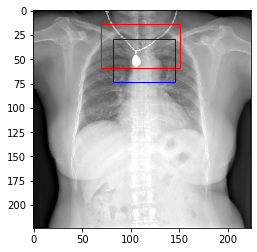

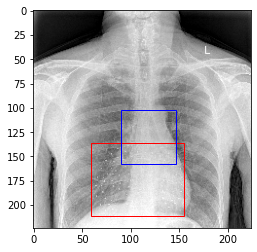

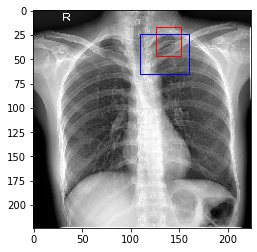

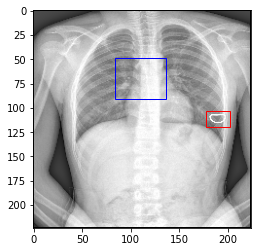

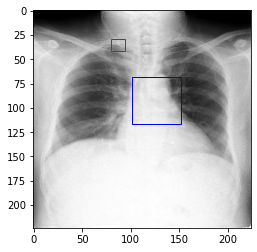

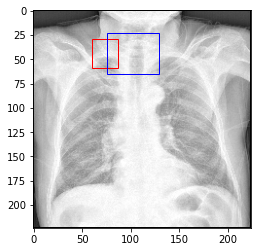

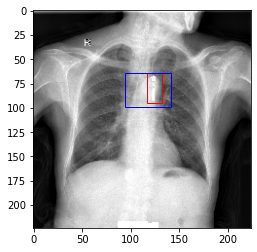

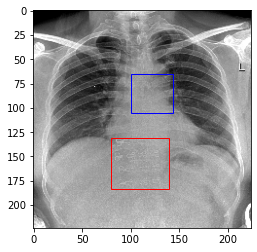

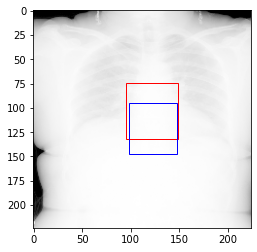

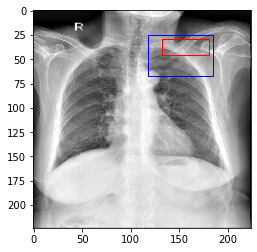

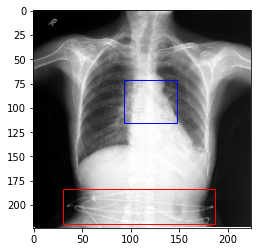

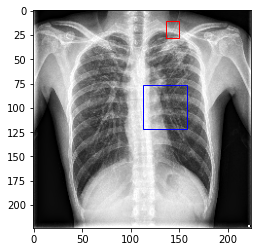

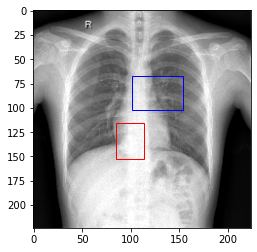

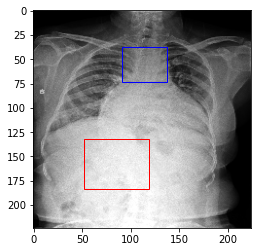

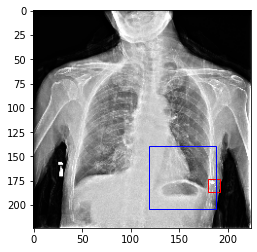

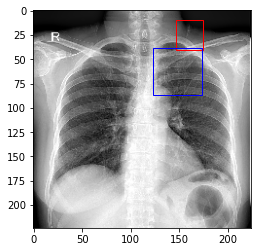

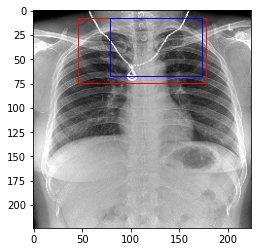

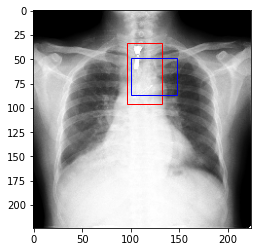

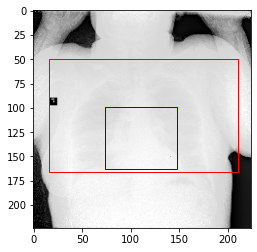

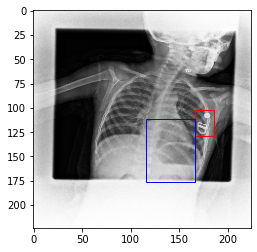

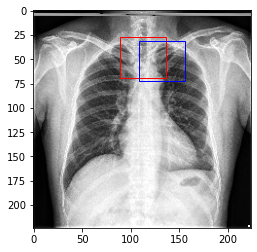

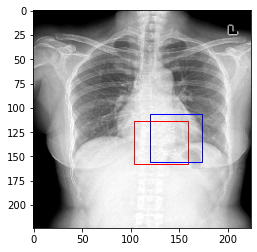

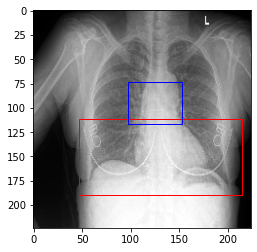

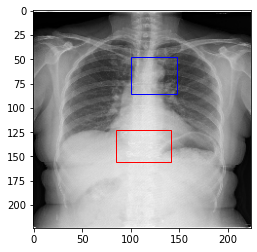

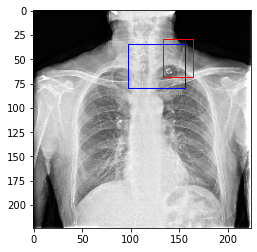

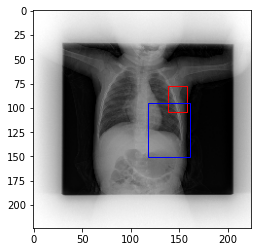

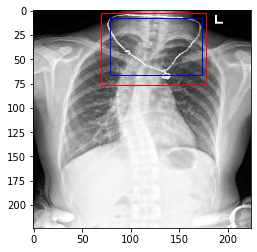

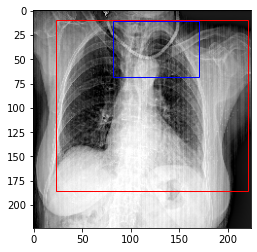

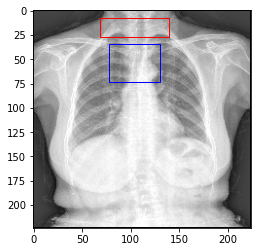

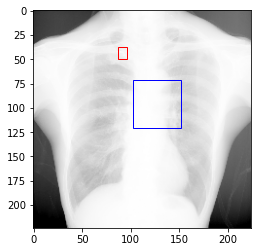

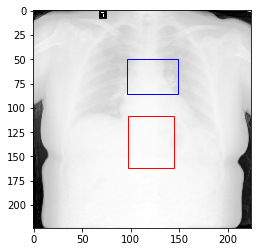

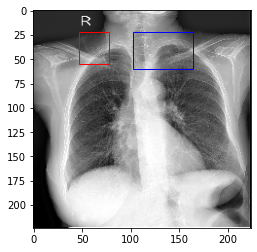

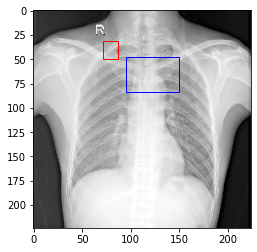

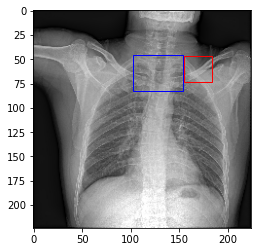

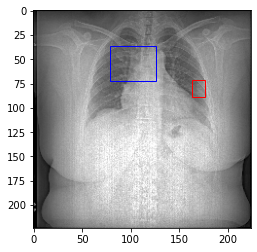

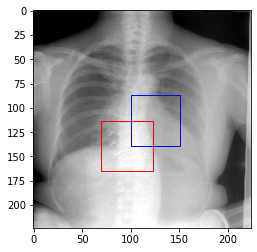

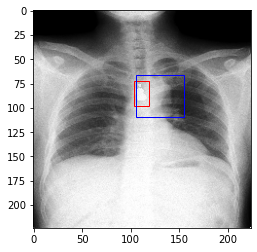

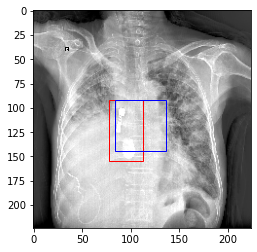

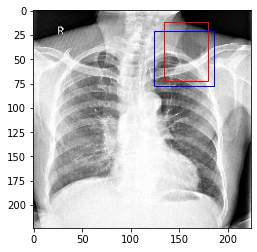

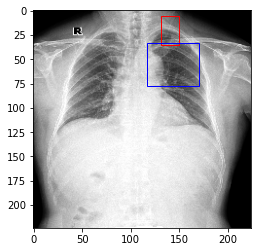

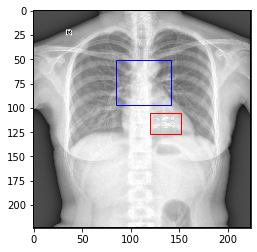

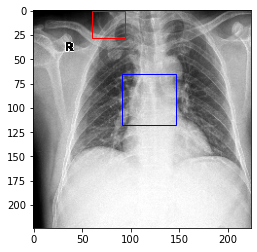

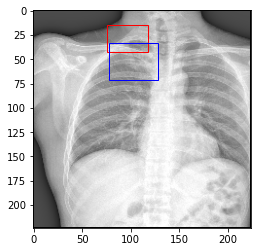

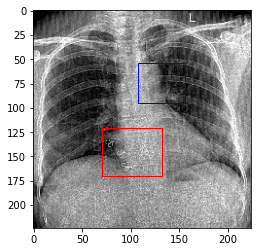

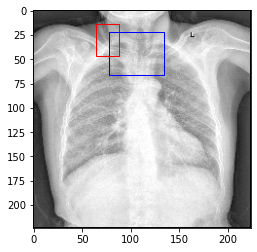

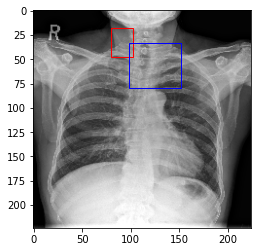

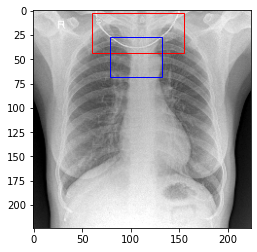

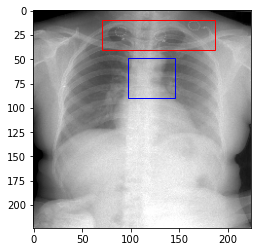

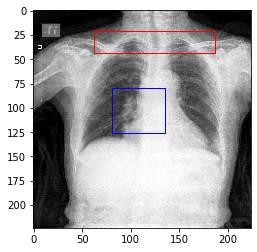

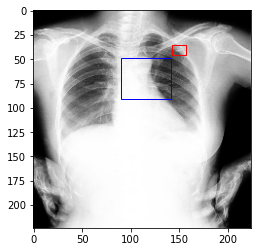

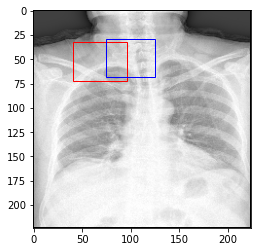

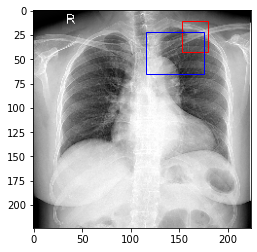

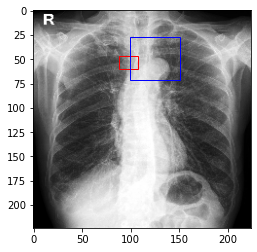

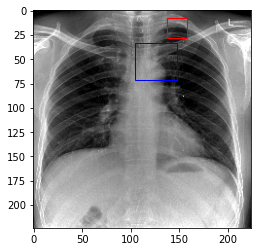

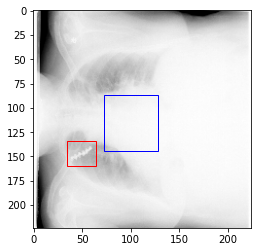

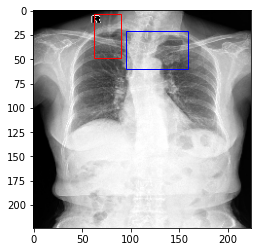

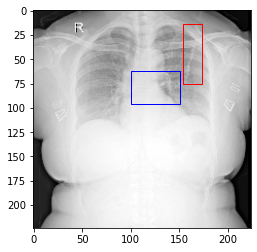

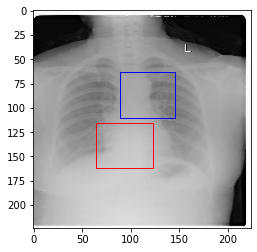

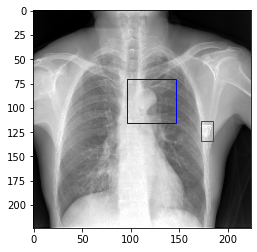

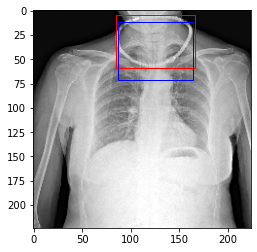

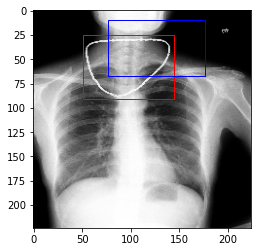

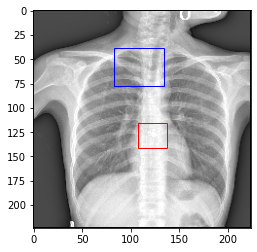

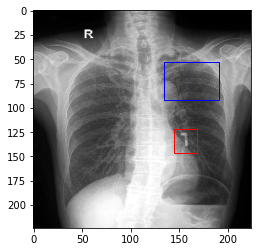

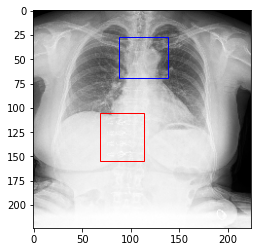

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for target in range(64):
    fig, ax = plt.subplots()
    ax.imshow(testdata[target])
    ax.add_patch(patches.Rectangle((testtargets[target][0] * 224, testtargets[target][1] * 224),
                                   (testtargets[target][2] - testtargets[target][0]) * 224,
                                   (testtargets[target][3] - testtargets[target][1]) * 224,
                                   linewidth = 1,
                                   edgecolor = 'r',
                                   facecolor = 'none'))

    ax.add_patch(patches.Rectangle((prediction[target][0] * 224, prediction[target][1] * 224),
                                   (prediction[target][2] - prediction[target][0]) * 224,
                                   (prediction[target][3] - prediction[target][1]) * 224,
                                   linewidth = 1,
                                   edgecolor = 'b',
                                   facecolor = 'none'))
    plt.show()


In [28]:
def iou_true(box1, box2):

    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    if x2 < x1 or y2 < y1:
        return 0.0
    else:
        overlap = (x2 - x1) * (y2 - y1)
        box1size = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2size = (box2[2] - box2[0]) * (box2[3] - box2[1])
        iou = overlap / float((box1size + box2size) - overlap)
        return iou


In [29]:
for target in range(64):
    print(f"iou: {iou_true(testtargets[target], prediction[target])}")


iou: 0.4171793689065432
iou: 0.13901759299392172
iou: 0.2546028565354004
iou: 0.0
iou: 0.0
iou: 0.11956219191198607
iou: 0.29324685310483567
iou: 0.0
iou: 0.47987099473385225
iou: 0.280096127157222
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.02522039148732407
iou: 0.012261064774340573
iou: 0.6298276017811918
iou: 0.4223592031110908
iou: 0.2071323316901609
iou: 0.0004909565680409298
iou: 0.37387387299333386
iou: 0.4732463316337373
iou: 0.020749485095547852
iou: 0.0
iou: 0.2405490265016512
iou: 0.07061154769987235
iou: 0.6984781899434828
iou: 0.1467980659585134
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.11662998102051404
iou: 0.14905546750034754
iou: 0.4411165231468597
iou: 0.5874587194870515
iou: 0.016993442000567103
iou: 0.0
iou: 0.0
iou: 0.14047870910708246
iou: 0.0
iou: 0.08370713123622556
iou: 0.019086053969359796
iou: 0.17726941414693784
iou: 0.0
iou: 0.0
iou: 0.0
iou: 0.22781652176534242
iou: 0.1577487571401401
iou: 0.045906133831496
iou: 0.0
iou: 0.0
iou

In [30]:
performance = []

for target in range(len(prediction)):
    each = iou_true(testtargets[target], prediction[target])
    performance.append(each)


In [31]:
sum(performance) / len(prediction)


0.11399357833664814